# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def jaccard_similarity(d1,d2): # 2개의 문서
    lemmatizer = WordNetLemmatizer()    # 각 문서마다 포함된 word를 뽑은다음에 lemmatize 해서 list로 가지고있어야지

    words1 =[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]    # 소문자로 만들고  lemmatize로 하자
    words2 =[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    # 공통된 d1,d2의 사용되는 부분과 전체를 계산해야지 => intersection해야지

    inter = len(set(words1).intersection(set(words2)))  # 길이가 중요하니까 len으로 묶어주고
    union = len(set(words1).union(set(words2)))         #공통되게 사용되는 전체갯수

    return inter/union

In [3]:
d1= 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give me death'
d4= 'apple'
d5= 'banana'
print(jaccard_similarity(d1,d2))    # 0.22정도 유사도 나왓고
print(jaccard_similarity(d1,d3))    # 0.066
print(jaccard_similarity(d3,d2))    # 0.058
print(jaccard_similarity(d4,d5))

0.2222222222222222
0.06666666666666667
0.058823529411764705
0.0


In [4]:
# 이번엔 cos similarity를 사용해볼게

# vector 표현을 사용하니까

tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).todense()
print(cosine_similarity(tfidf[0], tfidf[1]))    
print(cosine_similarity(tfidf[2], tfidf[1]))
print(cosine_similarity(tfidf[2], tfidf[0]))

[[0.22861951]]
[[0.04765587]]
[[0.06083323]]


## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 55.4MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 
     |████████████████████████████████| 460kB 44.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
# !sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubu

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [8]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

# 한국어라 깨지게 나왔구만

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [9]:
# decode해서 가져와보자

raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])    # 첫번째 리뷰에 대한 내용만 가져와볼게

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [10]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)  # 형태소 변환 한걸로 다시 표현해보자

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [11]:
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [12]:
word2vec = Word2Vec(reviews, min_count=5)   # reviewsrk 10000개나 되는데 꽤 빠르네
word2vec

In [13]:
word2vec.most_similar('영화')   # 유사 단어를 뽑아보자

# vectorlize안에 있으니까 embedding 되어있다는거지

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('듯', 0.9613292217254639),
 ('마음', 0.9594705700874329),
 ('작품', 0.9528514742851257),
 ('이야기', 0.9520809650421143),
 ('남', 0.9483378529548645),
 ('현실', 0.9445621967315674),
 ('모습', 0.9436463117599487),
 ('따뜻', 0.9423989057540894),
 ('표현', 0.9400876760482788),
 ('느낌', 0.9384621381759644)]

* t-sne을 이용한 단어 벡터 시각화

In [14]:
# 시각화 할수도 있고

tsne = TSNE(n_components = 2)   # 2차원으로 만들게
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [15]:
vocab = word2vec.wv.vocab   # vocabolary만 따로 빼볼게
similarity = word2vec[vocab]    # 결과에대해 similarity를 뽑아내는거지
similarity  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.02044698, -0.02817621, -0.25082523, ..., -0.07245836,
         0.05560038, -0.15110244],
       [ 0.00605614,  0.04557066, -0.8045173 , ..., -0.11254422,
         0.47158986, -0.23233484],
       [-0.05059492,  0.30915126, -0.35823527, ..., -0.38202235,
         0.28764874, -0.5000991 ],
       ...,
       [-0.00665112, -0.00924005, -0.03250513, ..., -0.01457699,
        -0.00382224, -0.02063576],
       [ 0.00685181, -0.01203678, -0.03394062, ..., -0.00355724,
         0.00576995, -0.00293947],
       [ 0.00201804, -0.01092949, -0.04740397, ..., -0.00709267,
         0.00391709, -0.01239746]], dtype=float32)

In [16]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)   #2차원으로 변환된 결과가 transform안에 들어가겟지
df= pd.DataFrame(transform_similarity, index = vocab, columns =['x','y'])

df[:10]     # 2차원형태로 바꾼거지 tsne로 n_component=2로 했으니까 columns에 x,y2개 열 만들어주고


,x,y
어릴,4.000134,-24.977583
때,50.094406,-16.280178
보,56.105358,-15.755507
고,56.257660,-17.118345
지금,53.998947,-17.615662
다시,55.666786,-16.862364
봐도,54.868382,-18.555418
재밌,55.077976,-28.166721
어요,54.077389,-29.891092
ㅋㅋ,53.270485,-32.442039


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


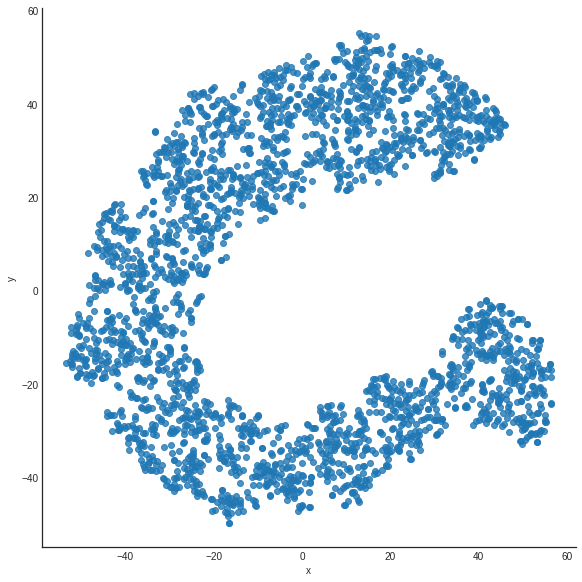

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

sns.lmplot('x','y',data=df, fit_reg = False, size = 8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [31]:
# 1.ward가 default로 사용할만큼 무난하대

from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
predict = ward.fit_predict(df)  # 아까 만든 df로 해보자
predict

array([5, 1, 1, ..., 0, 0, 0])

In [32]:
result = df
result['predict'] = predict
result[0:10]    # 어느 클래스터 넘버에 들어가는지 열 만들어 너놓고

,x,y,predict
어릴,4.000134,-24.977583,5
때,50.094406,-16.280178,1
보,56.105358,-15.755507,1
고,56.257660,-17.118345,1
지금,53.998947,-17.615662,1
다시,55.666786,-16.862364,1
봐도,54.868382,-18.555418,1
재밌,55.077976,-28.166721,1
어요,54.077389,-29.891092,1
ㅋㅋ,53.270485,-32.442039,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


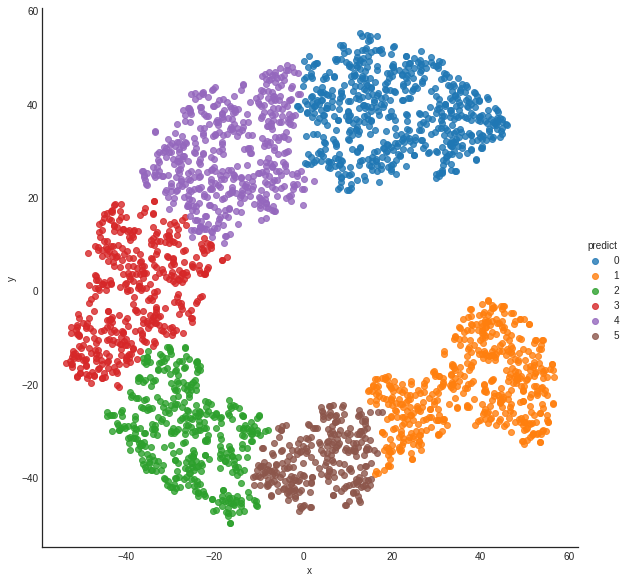

In [33]:
sns.lmplot('x','y' ,data =result, fit_reg = False , size = 8, hue = 'predict') # 색깔 구분=hue=> predcit 기준으로 나눌게
plt.show()

#### average

In [34]:
avg = AgglomerativeClustering(n_clusters = 6 ,linkage = 'average')
predict = avg.fit_predict(df)# avg로 학습해놓을게
predict

array([2, 3, 3, ..., 0, 0, 0])

In [35]:
results = df
results['predict'] = predict
# results[0:10]
results[:10]

,x,y,predict
어릴,4.000134,-24.977583,2
때,50.094406,-16.280178,3
보,56.105358,-15.755507,3
고,56.257660,-17.118345,3
지금,53.998947,-17.615662,3
다시,55.666786,-16.862364,3
봐도,54.868382,-18.555418,3
재밌,55.077976,-28.166721,3
어요,54.077389,-29.891092,3
ㅋㅋ,53.270485,-32.442039,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


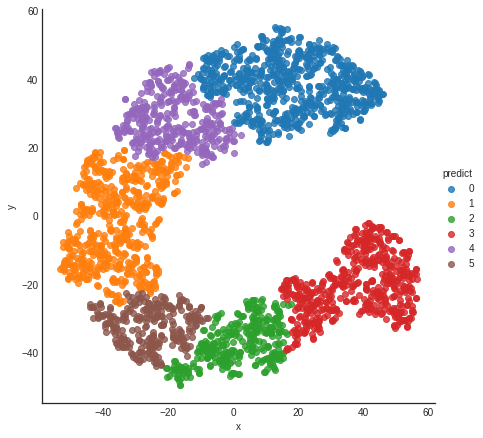

In [38]:
sns.lmplot('x','y', data=results, fit_reg = False, size = 6, hue ='predict')

# 좌표는 똑같지만 색갈의 분포가 다르지
# 차이점 ward vs average 분산과 클러스터간의 거리

#### complete

In [39]:
compl = AgglomerativeClustering(n_clusters = 6 , linkage = 'complete')
predict = compl.fit_predict(df)
predict

array([3, 5, 5, ..., 1, 1, 1])

In [40]:
results = df
results['predict'] = predict
results

,x,y,predict
어릴,4.000134,-24.977583,3
때,50.094406,-16.280178,5
보,56.105358,-15.755507,5
고,56.257660,-17.118345,5
지금,53.998947,-17.615662,5
...,...,...,...
하지원,32.802448,29.301741,1
아줌마,27.637589,35.659000,1
예뻐,37.845409,33.229366,1
비밀,44.725834,36.811661,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


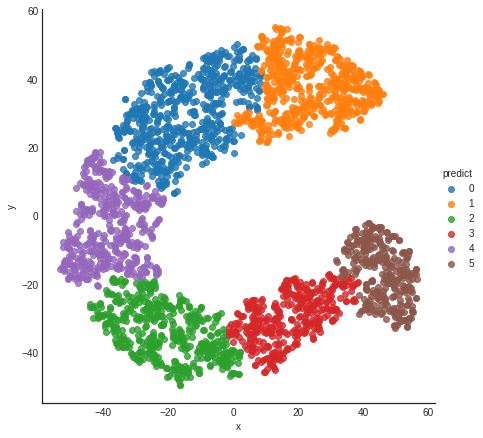

In [42]:
sns.lmplot('x','y', data = results, fit_reg = False, size= 6 , hue = 'predict')

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [44]:
# 비계층적 해볼게는 아니고 아직 
# 계측적은 계산된 결과가 필요하잖아

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage,dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

# distance가 다 계산된 결과를 얻어냈고


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,46.950259,52.952820,52.883047,50.577458,52.338320,51.311040,51.216371,50.357463,49.872694,46.656955,38.339610,46.454621,52.116063,40.752071,42.590210,56.557892,38.975756,44.084709,44.602954,44.881146,76.994546,35.946069,41.937878,50.497105,43.960730,28.378321,51.051569,45.572126,22.446396,41.577499,31.206244,41.627621,48.949586,66.214669,31.652539,42.063068,44.343678,40.785817,37.680756,...,65.357398,50.692346,51.504397,74.847786,57.403340,67.092650,57.476553,49.112324,60.220662,66.678507,58.779295,56.827093,55.223947,74.585370,64.051506,65.490740,63.671256,75.368887,63.088405,52.064487,77.494693,57.910018,54.711459,22.884343,54.580299,62.845369,65.676020,52.819084,46.522688,73.773823,58.238877,73.225986,43.994356,72.263971,74.595577,61.480227,65.111631,67.361351,74.030354,70.761597
1,46.950259,0.000000,6.033807,6.219986,4.126616,5.602710,5.288436,12.888983,14.181718,16.470982,13.827984,16.752515,13.967323,97.648786,15.316982,16.549092,83.121935,16.392880,14.722444,14.658513,11.114982,63.744487,82.267143,88.701999,6.143469,11.030708,73.218628,14.542201,7.412533,31.803106,12.878566,15.991545,14.739395,2.959679,78.085442,15.386876,15.055565,4.049350,7.259691,83.618432,...,54.875732,74.265668,59.527630,76.069515,45.998071,58.860331,75.171855,64.229594,84.454924,59.271306,74.464192,55.775488,59.699517,57.901907,75.188814,65.063343,71.879518,59.058142,50.285084,54.601251,67.537167,51.981506,55.923455,68.181482,76.381433,74.894239,51.435314,53.464562,76.200460,76.177713,87.496507,60.227497,76.008900,53.000396,70.781336,48.915469,56.727303,51.158899,53.512288,57.047543
2,52.952820,6.033807,0.000000,1.371322,2.810185,1.190578,3.060982,12.453664,14.280316,16.925627,16.490491,21.501094,16.698322,103.665798,19.648126,20.327859,88.119713,21.038950,18.188960,17.971322,14.587037,64.940540,88.177040,94.728313,6.400128,14.854825,79.025905,14.361569,10.302304,37.121573,17.246638,22.022286,18.897630,4.940955,81.924091,21.357896,19.071051,9.042046,12.681363,89.489983,...,56.842105,79.172697,63.508768,78.819299,48.319121,60.968172,79.598853,68.695812,89.261060,61.475051,78.731892,58.935808,63.315280,58.782767,79.019067,67.937266,75.497970,59.952537,52.140238,58.220385,69.087817,54.718316,59.337836,74.036660,81.119242,78.818926,53.006581,56.927493,81.493765,79.062032,92.638932,61.592009,81.445664,53.664975,73.058679,50.883998,58.905564,52.430369,53.933299,58.433886
3,52.883047,6.219986,1.371322,0.000000,2.312814,0.643940,1.998818,11.111178,12.957494,15.612137,17.635597,22.300851,17.836215,103.806223,20.538659,21.329609,88.896631,21.862963,19.231509,19.036471,15.600186,66.276538,87.957146,94.721589,7.623827,15.810921,78.714895,13.022002,9.405096,36.578609,18.115345,22.135135,19.820292,5.760607,82.979430,21.327463,20.022748,8.675003,12.331174,89.230739,...,58.124713,79.975507,64.531077,80.034076,49.564352,62.240886,80.530968,69.613913,90.096932,62.739476,79.700108,60.090216,64.403064,60.130851,80.074921,69.133482,76.589308,61.300442,53.429046,59.304595,70.405080,55.923836,60.455486,73.768354,81.972078,79.857198,54.316260,58.036071,82.162588,80.260936,93.367721,62.918039,82.053226,55.019023,74.320741,52.162931,60.171062,53.757818,55.294019,59.757509
4,50.577458,4.126616,2.810185,2.312814,0.000000,1.830067,1.280257,10.606091,12.275681,14.844263,16.747646,20.674423,16.926142,101.547756,19.068947,20.066050,87.166578,20.275944,18.071643,17.930245,14.413031,66.059486,85.648450,92.423709,7.236239,14.503836,76.419551,12.461416,7.536897,34.368868,16.625794,19.883760,18.412744,4.566632,81.737825,19.043242,18.668156,6.374967,10.032400,86.926359,...,57.607365,78.285307,63.227914,79.226715,48.902610,61.672923,79.045986,68.111346,88.450778,62.

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

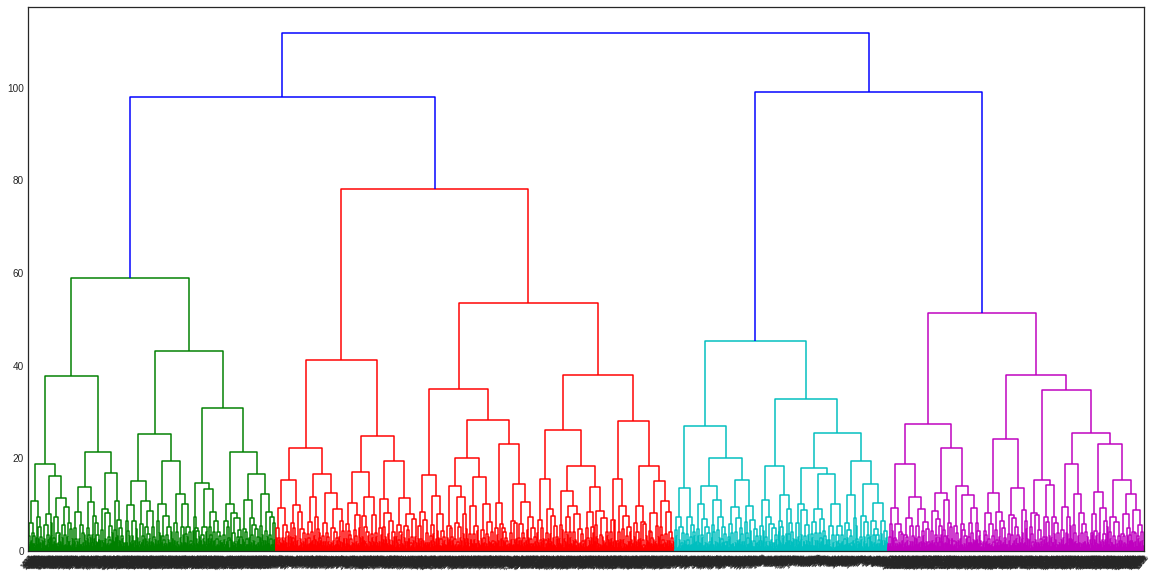

In [46]:
# 얻어낸 거리를 통해 시각화 해보자

row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize = (20,10))
dendrogram(row_clusters, 
           leaf_rotation = 50,
           leaf_font_size = 7)
plt.show()

# 어우야 엄청 많아서 안보이네
# 일단 계층이 보이지?
# 총 클러스터가 4개의 색으로 구분 되어있어


* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

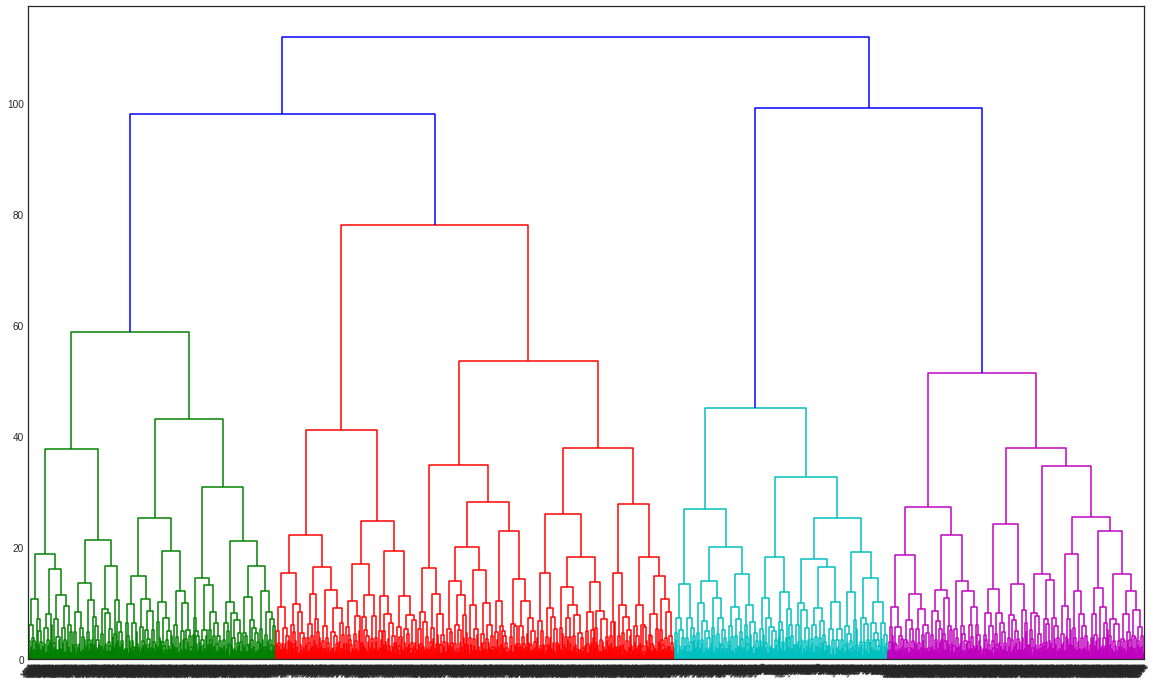

In [48]:
mergings = linkage(df, method = 'complete')

plt.figure(figsize = (20,12))
dendrogram(mergings,
           leaf_rotation = 50,
           leaf_font_size = 7)

plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
predict = kmeans.fit_predict(df)
predict
# 단어로 나는거지 이건

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [50]:
results = df
results['predict'] = predict
results

,x,y,predict
어릴,4.000134,-24.977583,1
때,50.094406,-16.280178,1
보,56.105358,-15.755507,1
고,56.257660,-17.118345,1
지금,53.998947,-17.615662,1
...,...,...,...
하지원,32.802448,29.301741,0
아줌마,27.637589,35.659000,0
예뻐,37.845409,33.229366,0
비밀,44.725834,36.811661,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


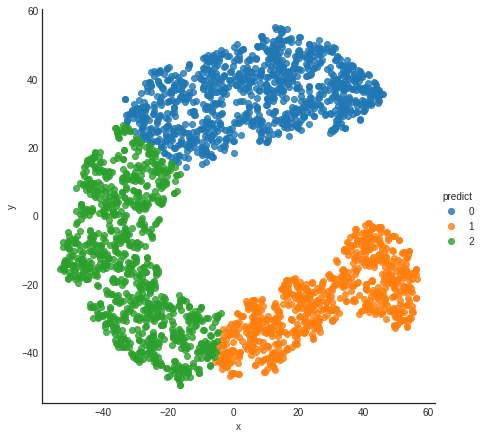

In [51]:
sns.lmplot('x','y', data = results, fit_reg = False, size = 6, hue = 'predict')
plt.show()

# 우리는 cluster를 3개로 지정해줫지
# 

### 클러스터 개수 6

In [52]:
kmeans = KMeans(n_clusters = 6)
predict = kmeans.fit_predict(df)
predict

array([5, 0, 0, ..., 3, 3, 3], dtype=int32)

In [53]:
results = df
results['predict'] = predict
results

,x,y,predict
어릴,4.000134,-24.977583,5
때,50.094406,-16.280178,0
보,56.105358,-15.755507,0
고,56.257660,-17.118345,0
지금,53.998947,-17.615662,0
...,...,...,...
하지원,32.802448,29.301741,3
아줌마,27.637589,35.659000,3
예뻐,37.845409,33.229366,3
비밀,44.725834,36.811661,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


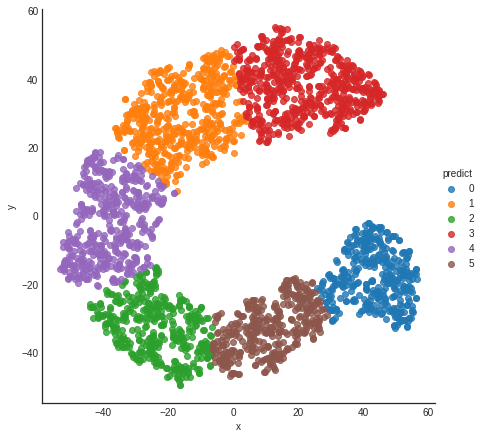

In [55]:
sns.lmplot('x','y', data =results, fit_reg = False, size = 6, hue = 'predict')
plt.show()

# 6개로 cluster가 구분 되는거 알수잇지